In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [30]:
path = '/Users/yuqianxie/Desktop/DS_proj_analysis/dataset'
os.chdir(path)
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/yuqianxie/Desktop/DS_proj_analysis/dataset


In [31]:
data = pd.read_excel('Merged_Sorted_Data_Device_Daily.xlsx')
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])
# Sort data by 'Date'
data = data.sort_values('Date')
# Select the 'Date' and 'Total Amount of Milk Produced' columns
sub_data = data.iloc[:, [1, 6]]
sub_data = sub_data.dropna()
print(sub_data.head())

         Date  Milk Tot.
3  2014-04-08        0.0
4  2014-04-08        0.0
5  2014-04-08        0.0
13 2014-04-09      187.4
12 2014-04-09      176.0


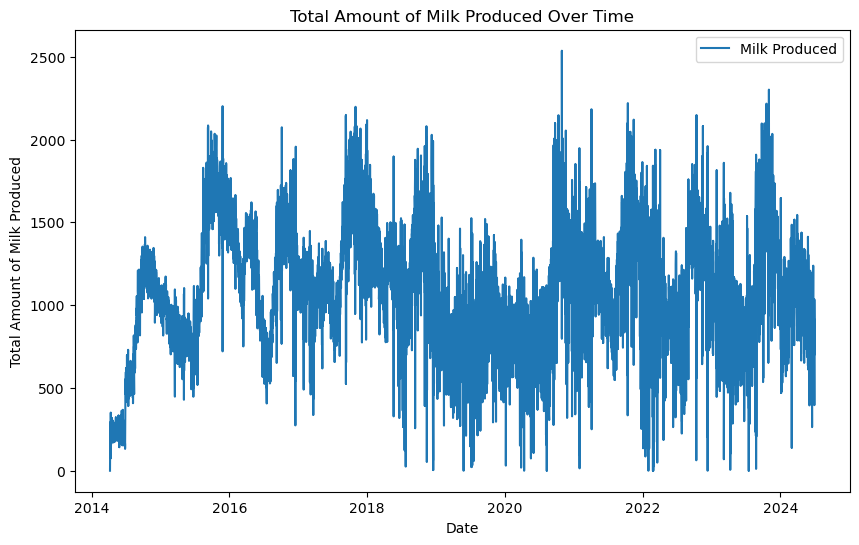

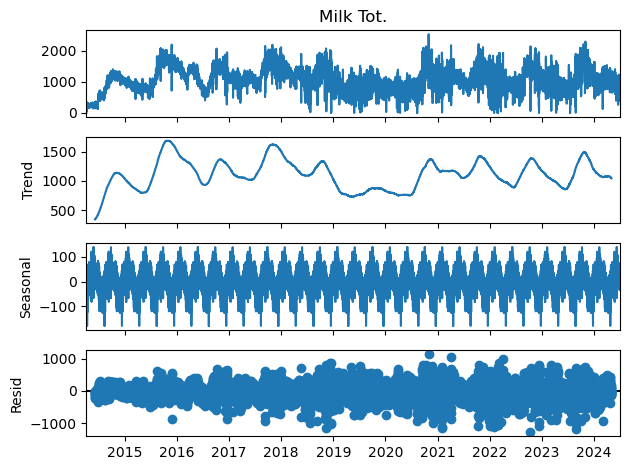

ADF Statistic: -3.856431970508886
p-value: 0.0023799373096559206
Critical Values: {'1%': -3.430936777295711, '5%': -2.86179932359876, '10%': -2.566908032833592}
The time series is stationary


In [32]:
sub_data.set_index('Date', inplace=True)
# Plotting the time series to check for trend
plt.figure(figsize=(10, 6))
plt.plot(sub_data.index, sub_data['Milk Tot.'], label='Milk Produced')
plt.title('Total Amount of Milk Produced Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount of Milk Produced')
plt.legend()
plt.show()

# Decomposing the time series to check for trend, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(sub_data['Milk Tot.'], model='additive', period=365)
decomposition.plot()
plt.show()

# ADF test to check for stationary
result = adfuller(sub_data['Milk Tot.'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("The time series is stationary")
else:
    print("The time series is non-stationary")

<Figure size 1000x600 with 0 Axes>

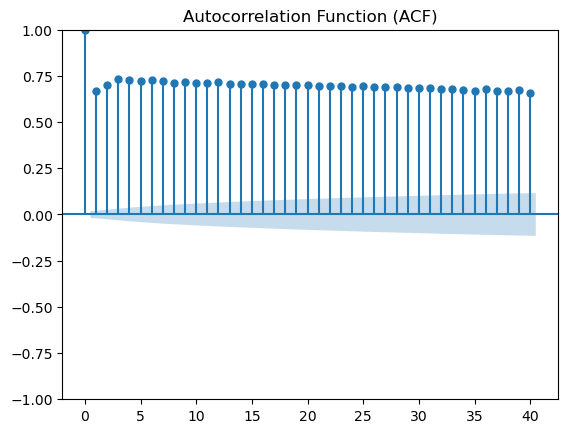

<Figure size 1000x600 with 0 Axes>

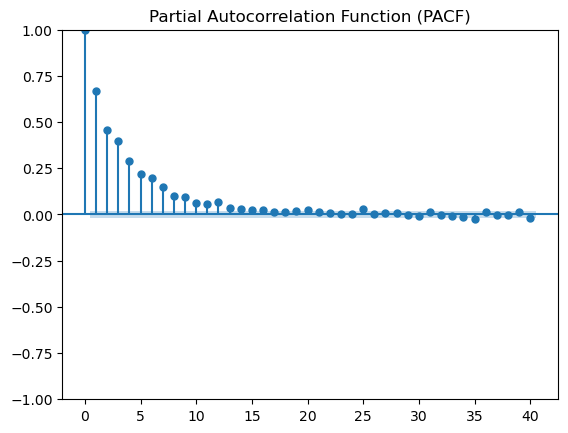

In [11]:
# Plot ACF (Auto-Correlation Function)
plt.figure(figsize=(10, 6))
plot_acf(sub_data['Milk Tot.'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF (Partial Auto-Correlation Function)
plt.figure(figsize=(10, 6))
plot_pacf(sub_data['Milk Tot.'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

ARIMA(1,1,0)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
data = pd.read_excel('Merged_Sorted_Data_Device_Daily.xlsx', parse_dates=['Date'])
data.set_index('Date', inplace=True)

# Handling duplicates by summing up 'Milk Tot.' for each day
data_aggregated = data.groupby(data.index).agg({'Milk Tot.': 'sum'})

# Drop rows with missing 'Milk Tot.' values
data_aggregated.dropna(subset=['Milk Tot.'], inplace=True)

# Check for continuous date range and fill missing dates if necessary
all_dates = pd.date_range(start=data_aggregated.index.min(), end=data_aggregated.index.max(), freq='D')
data_aggregated = data_aggregated.reindex(all_dates, fill_value=0)  # Replace missing dates with 0

# Fit the ARIMA model
model = ARIMA(data_aggregated['Milk Tot.'], order=(1, 1, 0))
fitted_model = model.fit()

# Forecast for the next 10 years
forecast_years = 10
forecast_periods = forecast_years * 365  # Approximate days in 10 years
forecast_result = fitted_model.get_forecast(steps=forecast_periods)

# Generate the forecast dates
forecast_dates = pd.date_range(start=data_aggregated.index.max(), periods=forecast_periods + 1, freq='D')[1:]

# Create a forecast dataframe
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_result.predicted_mean
})

# Save forecast to a CSV file
forecast_csv_path = 'forecast_arima_2025_2035.csv'
forecast_df.to_csv(forecast_csv_path, index=False)
# Plotting the forecast
# plt.figure(figsize=(10, 5))
# plt.plot(data_aggregated.index, data_aggregated['Milk Tot.'], label='Historical Data')
# plt.plot(forecast_dates, forecast_result.predicted_mean, label='Forecast', color='red')
# plt.title('Forecast of Milk Production')
# plt.xlabel('Date')
# plt.ylabel('Milk Tot.')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()